# NYC TLC NEW YORK CITY

# Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from scipy.stats import f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
from scipy.stats import normaltest
import matplotlib.colors as mcolors
from datetime import datetime


In [2]:
df = pd.read_csv('NYC TLC Trip Record.csv')
df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15020\47389403.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


# Data Understanding & Cleaning

Langkah pertama, melihat informasi umum dari dataset New York City TLC Trip Record

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

Untuk memudahkan dalam melihat isi informasinya, kita lakukan transpose dari kolom menjadi baris

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,68211.0,1.863028,0.343820,1.00,2.00,2.00,2.00,2.00
RatecodeID,63887.0,1.117160,1.372913,1.00,1.00,1.00,1.00,99.00
PULocationID,68211.0,98.549735,61.244314,1.00,74.00,75.00,129.00,265.00
DOLocationID,68211.0,138.429901,76.761311,1.00,74.00,138.00,219.00,265.00
passenger_count,63887.0,1.315870,0.979054,0.00,1.00,1.00,1.00,9.00
trip_distance,68211.0,8.114852,585.105955,0.00,1.11,1.85,3.21,120098.84
fare_amount,68211.0,16.603545,13.470121,-70.00,9.30,13.50,19.80,490.00
extra,68211.0,0.825431,1.269904,-2.50,0.00,0.00,1.00,12.50
mta_tax,68211.0,0.588340,0.385819,-0.50,0.50,0.50,0.50,2.75
tip_amount,68211.0,2.139012,3.052710,-10.50,0.00,1.60,3.33,222.22


Selanjutnya memfilter data yang dibutuhkan oleh saya yang menempatkan sebagai Staff Data Analyst oleh stackholder vendor 2 yaitu VeriFone Inc.

In [5]:
# Filter kolom untuk vendor 2 saja karena permintaan stackholder
df = df[df["VendorID"] == 2]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,1.0,0.5,0.00,0.0,NaN,1.0,22.95,2.0,1.0,2.75
7,2,2023-01-01 00:11:58,2023-01-01 00:24:55,N,1.0,24,75,1.0,1.88,14.20,1.0,0.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


Kemudian menghapus kolom yang tidak related atau tidak digunakan seperti VendorID, dan ehail_fee

In [6]:
df = df.drop(["VendorID","ehail_fee","extra","mta_tax"], axis=1)
df

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.94,0.0,1.0,11.64,1.0,1.0,0.00
5,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,0.00,0.0,1.0,22.95,2.0,1.0,2.75
7,2023-01-01 00:11:58,2023-01-01 00:24:55,N,1.0,24,75,1.0,1.88,14.20,0.00,0.0,1.0,16.70,2.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,3.20,0.0,1.0,19.18,NaN,NaN,NaN


Kemudian setelah mendapatkan kolom yang diperlukan, saya cek apakah terdapat data yang duplikat

In [7]:
df.duplicated().value_counts()

False    58868
Name: count, dtype: int64

Kemudian saya mengecek data yang memiliki informasi berupa tanggal apakah sudah datetime atau belum, jika belum perlu diubah menjadi format dateime untuk analisa selanjutnya

In [8]:
# Mengecek tipe data pada lpep_pickup_datetime dan lpep_dropoff_datetime
df[["lpep_pickup_datetime","lpep_dropoff_datetime"]].dtypes

lpep_pickup_datetime     object
lpep_dropoff_datetime    object
dtype: object

In [9]:
# diubah ke datetime untuk cek tanggal / waktu nya
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

df[['lpep_pickup_datetime','lpep_dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 58868 entries, 0 to 68210
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   58868 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  58868 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.3 MB


## Missing Value

Langkah selanjutnya melihat apakah terdapat Missing Value dari Dataset NYC TLC Trip Record.csv tersebut

In [10]:
# Mengecek apakah ada missing value
df.isna().sum()

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4196
RatecodeID               4196
PULocationID                0
DOLocationID                0
passenger_count          4196
trip_distance               0
fare_amount                 0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4196
trip_type                4196
congestion_surcharge     4196
dtype: int64

In [11]:
# Menghitung jumlah missing values
df.isna().sum() / len(df) * 100

lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       7.127811
RatecodeID               7.127811
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          7.127811
trip_distance            0.000000
fare_amount              0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             7.127811
trip_type                7.127811
congestion_surcharge     7.127811
dtype: float64

Karena ada Missing Value yang terdeteksi, langkah selanjutnya melihat persebaran pada masing-masing kolom dengan Displot dan Heatmap

<Figure size 700x500 with 0 Axes>

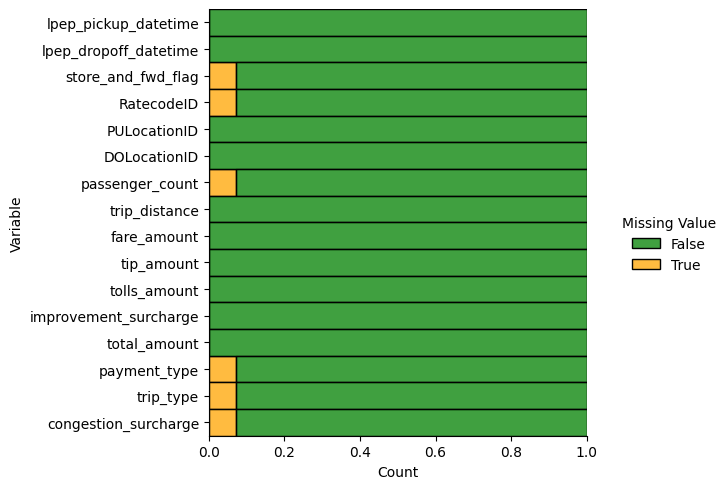

In [12]:
# Melihat persebaran Missing Value Pada Masing-Masing Kolom menggunakan Displot
plt.figure(figsize=(7, 5))
mv = sns.displot(
    data=df.isna().melt(value_name="Missing Value"),
    y="variable",
    hue="Missing Value",
    multiple="fill",
    aspect=1.25,
    palette={False: "green", True: "orange"}
)

mv.set(ylabel="Variable")
plt.show()

<Axes: >

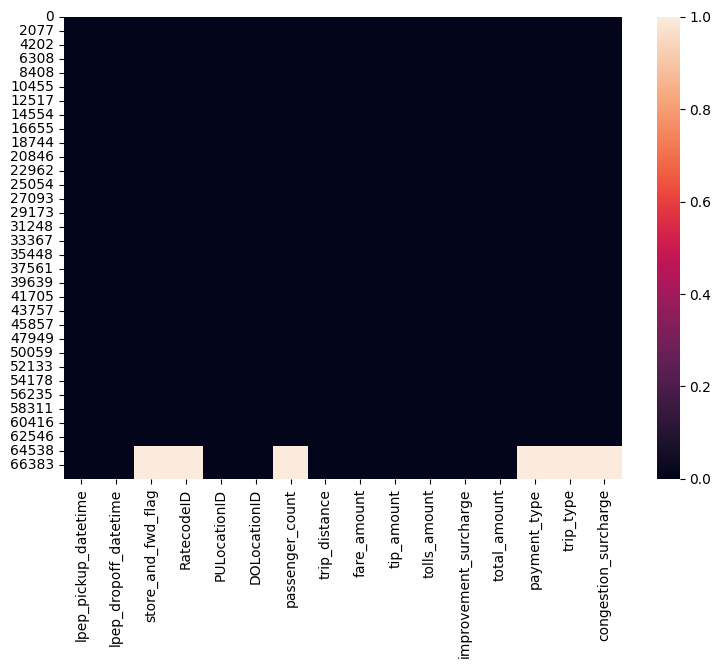

In [13]:
# Melihat persebaran Missing Value Pada Masing-Masing Kolom menggunakan Heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(df.isna())

Dari data diatas didapatkan informasi Missing Value pada kolom variable store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type, dan congestion_surcharge memiliki proporsi yang sedikit yaitu <10%. 

Hal ini bisa menjadi acuan untuk mengambil keputusan dalam menangani Missing Valuenya :
1. Jika sangat sedikit (1% - 3%) bisa di drop barisnya
2. Jika missing values sedikit (dibawah 10%) maka bisa diisi dengan central tendency (mean atau median atau modus)
3. Jika missing values lebih dari 10-30% maka bisa pertimbangkan untuk menggunakan machine learning untuk imputasi seperti regression imputation atau KNN imputation (HANYA UNTUK NUMERIK)
4. Jika sudah lebih dari 30% (atau 40%) maka bisa dipertimbangkan untuk dihapus kolom nya (kolom atau variabel tidak dapat digunakan)


### Central Tendency

In [14]:
# Mengisi Missing Value dengan median (nilai tengah) di kolom yang memiliki variable type numerik
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())

In [15]:
# Mengisi Missing Value dengan modus (nilai terbanyak) di kolom yang memiliki variable type non-numerik
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])
df['payment_type'] = df['payment_type'].fillna(df['payment_type'].mode()[0])
df['trip_type'] = df['trip_type'].fillna(df['trip_type'].mode()[0])

In [16]:
# Cek data setelah menghapus missing value
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

Kemudian menjadikan kolom RatecodeID, payment_type, trip_type menjadi tipe data Category

#### RatecodeID

In [17]:
# Mengubah RatecodeID dari float menjadi categorical
df['RatecodeID'] = df['RatecodeID'].replace({
    1: "Tarif standar",
    2: "Bandara JFK",
    3: "Bandara Newark",
    4: "Nassau atau Westchester",
    5: "Tarif yang dinegosiasikan",
    6: "Perjalanan kelompok"
})
df['RatecodeID'].value_counts()

RatecodeID
Tarif standar                57197
Tarif yang dinegosiasikan     1451
Bandara JFK                    144
Nassau atau Westchester         50
Bandara Newark                  26
Name: count, dtype: int64

#### payment_type

In [18]:
# Mengubah payment_type dari float menjadi categorical
df['payment_type'] = df['payment_type'].replace({
    1: "Kartu kredit",
    2: "Tunai",
    3: "Tanpa biaya",
    4: "Sengketa",
    5: "Tidak diketahui",
    6: "Perjalanan dibatalkan"
})
df['payment_type'].value_counts()

payment_type
Kartu kredit    38768
Tunai           19758
Tanpa biaya       278
Sengketa           64
Name: count, dtype: int64

In [19]:
# Hilangkan nilai payment_type anomali
df = df[~df['payment_type'].isin(["Tanpa biaya", "Sengketa"])]

# Cek hasilnya
df['payment_type'].value_counts()

payment_type
Kartu kredit    38768
Tunai           19758
Name: count, dtype: int64

#### trip_type

In [20]:
# Mengubah trip_type dari float menjadi categorical
df['trip_type'] = df['trip_type'].replace({
    1: "Dihentikan langsung di jalan",
    2: "Dipesan melalui layanan"
})
df['trip_type'].value_counts()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15020\1590261102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_type'] = df['trip_type'].replace({


trip_type
Dihentikan langsung di jalan    57202
Dipesan melalui layanan          1324
Name: count, dtype: int64

Kemudian aku ingin mengecek jumlah kolom pada data

In [21]:
# Melakukan cek jumlah kolom pada dataframe yang merupakan non-numerik
column_category = [column for column in df.columns if df[column].dtype == "object"]
column_category

['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type']

In [22]:
# Melakukan cek jumlah kolom pada dataframe yang merupakan numerik
column_numerik = [column for column in df.columns if df[column].dtype == "float64"] + [column for column in df.columns if df[column].dtype == "int64"]
column_numerik

['passenger_count',
 'trip_distance',
 'fare_amount',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'PULocationID',
 'DOLocationID']

### Uji Statistika

In [23]:
# Memanggil kolom numerik
numerik = df.select_dtypes(include='number') # yg mengandung integer dan float akan masuk
numerik

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,166,143,1.0,2.58,14.90,4.03,0.0,1.0,24.18,2.75
1,24,43,1.0,1.81,10.70,2.64,0.0,1.0,15.84,0.00
2,223,179,1.0,0.00,7.20,1.94,0.0,1.0,11.64,0.00
5,41,262,1.0,2.78,17.70,0.00,0.0,1.0,22.95,2.75
7,24,75,1.0,1.88,14.20,0.00,0.0,1.0,16.70,0.00
...,...,...,...,...,...,...,...,...,...,...
68206,49,62,1.0,4070.82,15.70,0.00,0.0,1.0,16.70,0.00
68207,10,205,1.0,2.14,4.41,0.00,0.0,1.0,5.41,0.00
68208,66,37,1.0,3.44,16.53,3.51,0.0,1.0,21.04,0.00
68209,225,189,1.0,3.03,14.98,3.20,0.0,1.0,19.18,0.00


##### Kolmogorov Smirnov

In [24]:
for kolom in numerik.columns :
    stat, pval = kstest(df[kolom], 'norm')
    if pval < 0.05:
        print(f'Kolom {kolom} Distribusi tidak normal (Tolak H0)')
    else:
        print(f'Kolom {kolom} Distribusi normal (Terima H0')

Kolom PULocationID Distribusi tidak normal (Tolak H0)
Kolom DOLocationID Distribusi tidak normal (Tolak H0)
Kolom passenger_count Distribusi tidak normal (Tolak H0)
Kolom trip_distance Distribusi tidak normal (Tolak H0)
Kolom fare_amount Distribusi tidak normal (Tolak H0)
Kolom tip_amount Distribusi tidak normal (Tolak H0)
Kolom tolls_amount Distribusi tidak normal (Tolak H0)
Kolom improvement_surcharge Distribusi tidak normal (Tolak H0)
Kolom total_amount Distribusi tidak normal (Tolak H0)
Kolom congestion_surcharge Distribusi tidak normal (Tolak H0)


##### D'Agustio Pearson

In [25]:
for kolom in numerik.columns:
    stat, pval = normaltest(df[kolom])
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi PULocationID tidak normal (Tolak H0)
Distribusi DOLocationID tidak normal (Tolak H0)
Distribusi passenger_count tidak normal (Tolak H0)
Distribusi trip_distance tidak normal (Tolak H0)
Distribusi fare_amount tidak normal (Tolak H0)
Distribusi tip_amount tidak normal (Tolak H0)
Distribusi tolls_amount tidak normal (Tolak H0)
Distribusi improvement_surcharge tidak normal (Tolak H0)
Distribusi total_amount tidak normal (Tolak H0)
Distribusi congestion_surcharge tidak normal (Tolak H0)


## Outliers

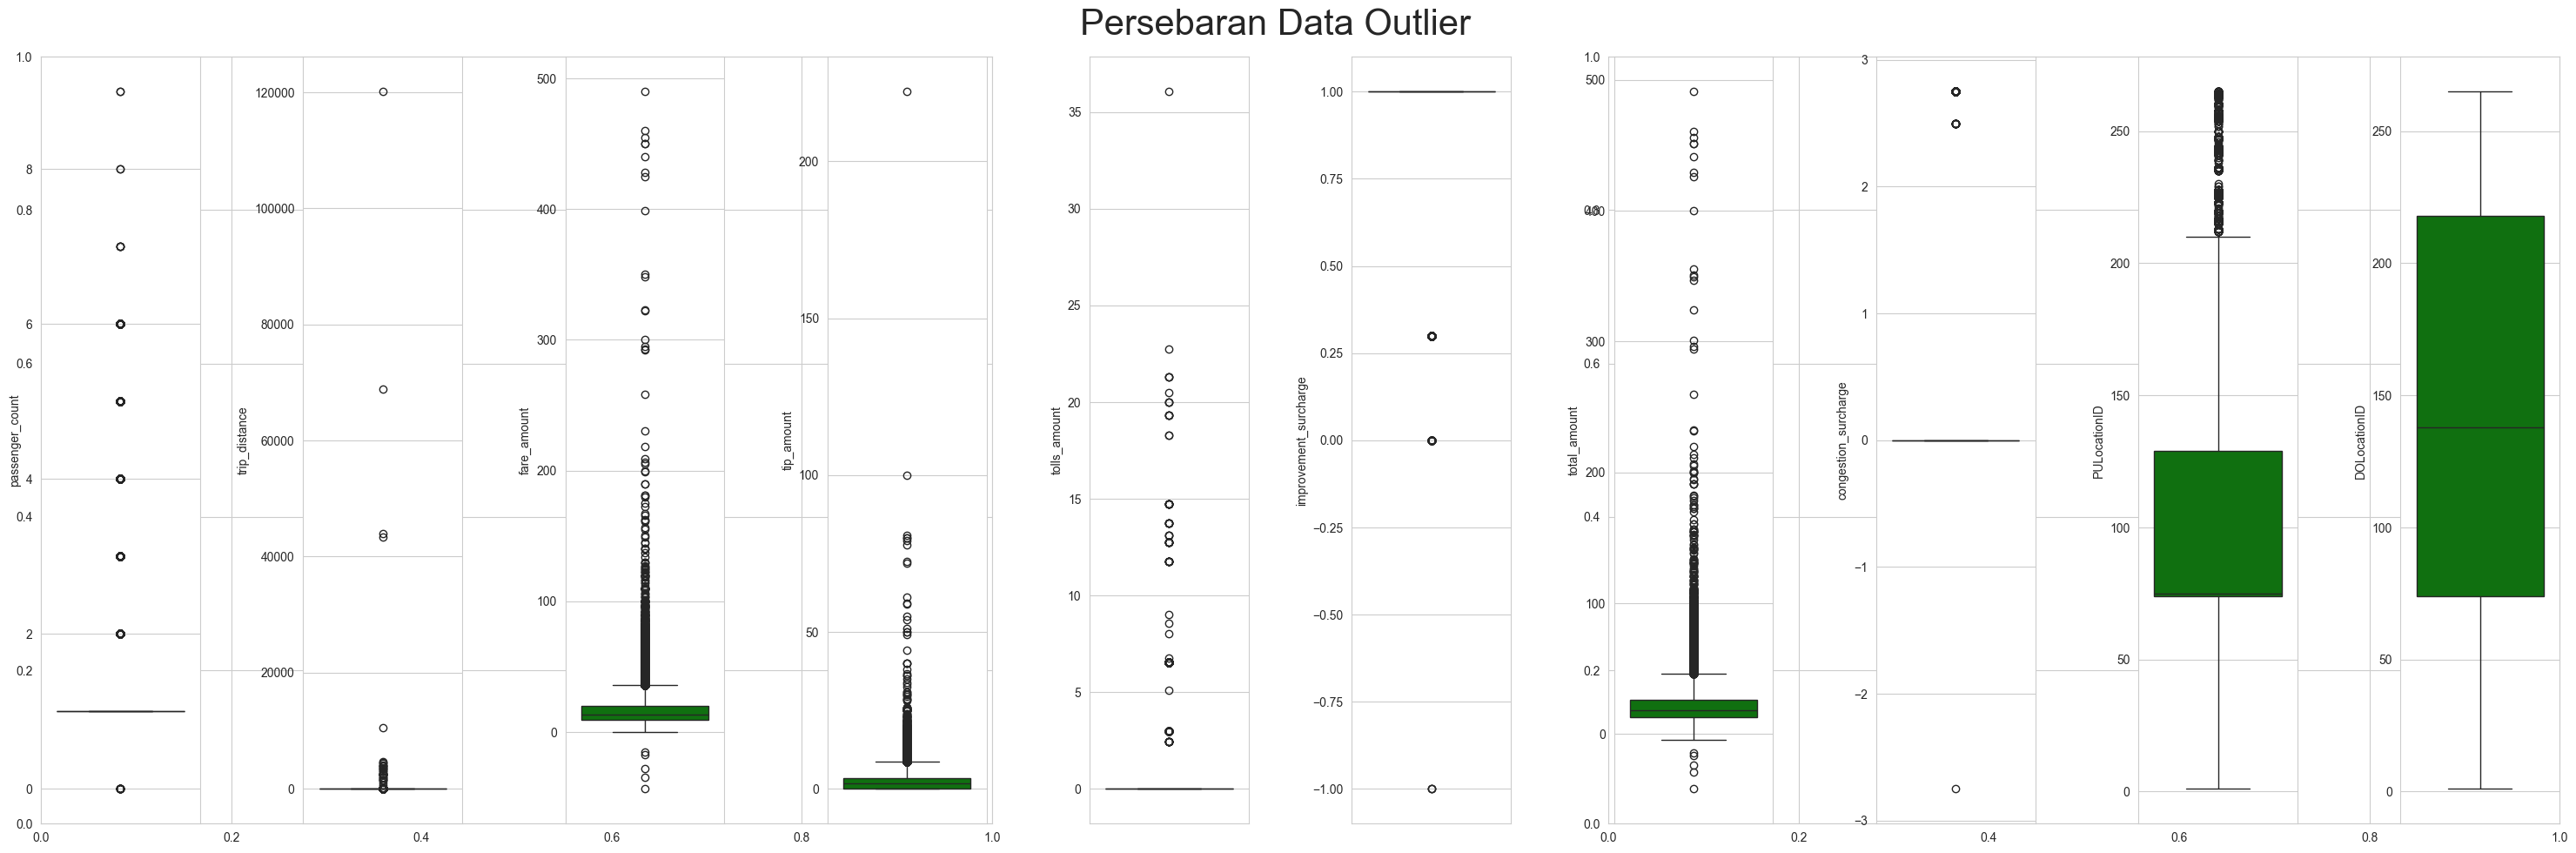

In [26]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Persebaran Data Outlier', fontsize=30)

for i in range(0, len(column_numerik)):
    plt.subplot(1, len(column_numerik), i + 1)
    sns.boxplot(y=df[column_numerik[i]], color = 'green', orient='v')
    plt.tight_layout()

Dari persebaran data outlier diatas dapat diambil kesimpulan hanya PULocationID dan DOLocationID yang tidak terdapat outlier karena termasuk data kategorik.


## Minus (-) Value

In [27]:
# Mengecek apakah ada data yang minus
df[column_numerik].min()
df[column_numerik].min() / len(df) * 100


passenger_count          0.000000
trip_distance            0.000000
fare_amount             -0.074394
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge   -0.001709
total_amount            -0.071387
congestion_surcharge    -0.004699
PULocationID             0.001709
DOLocationID             0.001709
dtype: float64

Terdapat Beberapa Kolom yang Memuat Nilai Negatif

Kolom yang seharusnya tidak mungkin negatif tapi ditemukan nilainya < 0 dan Proporsi Data Negatif < 1%
Langkah terbaik: hapus semua baris yang mengandung nilai negatif di kolom yang seharusnya positif, untuk menjaga kualitas analisis.

Impact ke Analisis:
Membersihkan data negatif akan :
- Meningkatkan akurasi penghitungan rata-rata & total revenue
- Menghindari korelasi salah atau misleading insight
- Membantu prediksi menjadi lebih andal

In [28]:
# Filter baris valid: semua kolom biaya harus >= 0
df = df[
    (df['fare_amount'] >= 0) &
    (df['tip_amount'] >= 0) &
    (df['improvement_surcharge'] >= 0) &
    (df['congestion_surcharge'] >= 0) &
    (df['total_amount'] >= 0)
]

In [29]:
# Mengecek kolom numerik setelah dibersihkan
df[column_numerik].min()

passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
PULocationID             1.0
DOLocationID             1.0
dtype: float64

Data sudah saya anggap bersih dan akan saya ekspor ke dalam bentuk Excel untuk keperluan visualisasi selanjutnya

In [30]:
# df.to_excel("Capstone Modul 2 New.xlsx", index=False)   

# Data Analisis

# Analisa Pola Perjalanan dan Strategi Peningkatan Profit

## Berdasarkan Lokasi Pickup

In [31]:
df_locCust = df['PULocationID'].value_counts().reset_index()
df_locCust.head(10)

,PULocationID,count
0,74,10795
1,75,7874
2,95,3732
3,41,3619
4,166,3447
5,82,2678
6,43,2647
7,97,1900
8,7,1834
9,42,1549


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15020\3722168898.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


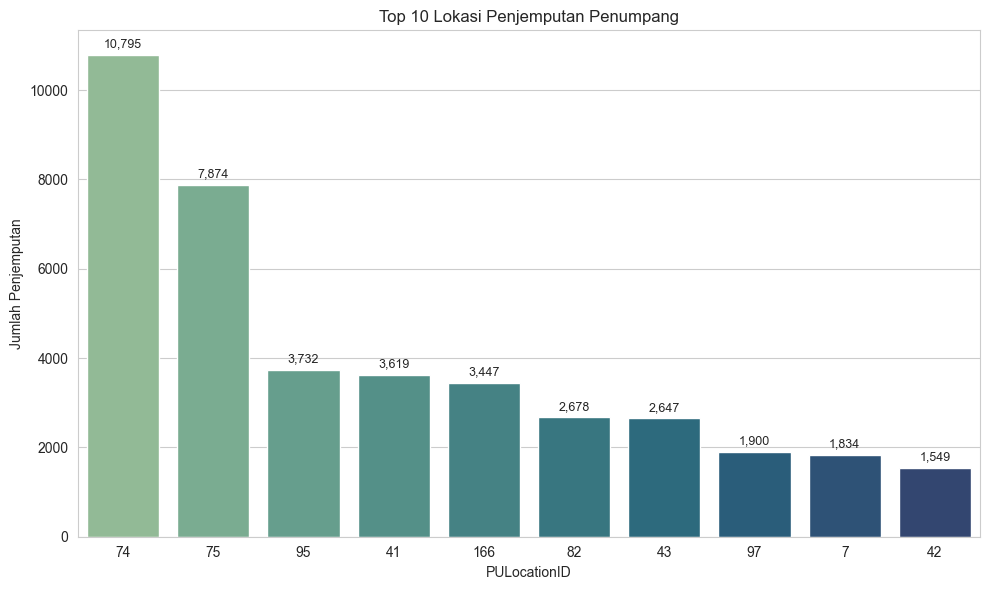

In [32]:
# Ambil dan urutkan Top 10 berdasarkan count tertinggi
top10 = df_locCust.head(10)

plt.figure(figsize=(10, 6))

# Buat barplot dengan urutan sesuai count tertinggi
barplot = sns.barplot(
    data=top10,
    x='PULocationID',
    y='count',
    palette='crest',
    order=top10['PULocationID']
)

# Tambahkan nilai count di atas setiap bar
for i, (index, row) in enumerate(top10.iterrows()):
    barplot.text(
        x=i,
        y=row['count'] + 100,  # posisi teks sedikit di atas batang
        s=f"{row['count']:,}",  # format angka ribuan
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Top 10 Lokasi Penjemputan Penumpang')
plt.xlabel('PULocationID')
plt.ylabel('Jumlah Penjemputan')
plt.tight_layout()
plt.show()

Insight:
- Lokasi dengan ID 74 merupakan lokasi penjemputan paling populer dengan 10.795 penjemputan, jauh melampaui lokasi lainnya.
- Lokasi ID 75 menempati posisi kedua dengan 7.874 penjemputan, selisih signifikan dari posisi pertama (~2.900 penumpang).
- Tiga lokasi teratas (ID 74, 75, dan 95) menyumbang porsi terbesar dari seluruh aktivitas penjemputan, menandakan area ini sangat sibuk, bisa jadi itu dikarenakan adalah merupakan pusat kota atau kawasan ramai seperti terminal, stasiun, atau pusat bisnis.
- Penurunan jumlah penjemputan cukup tajam setelah lokasi ketiga, menandakan distribusi penjemputan tidak merata — mayoritas penumpang terkonsentrasi di sedikit lokasi.

In [33]:
# Namun masih banyak lokasi penjemputan yang kurang efisien yang hanya memiliki total jumlah penjemputan kurang dari 10
df_LocLess10 = df_locCust[df_locCust['count'] <= 10]
df_LocLess10 = df_LocLess10.groupby('count').count().reset_index().sort_values('count', ascending=True)
df_LocLess10['count'] = df_LocLess10['count'].astype(str)
df_LocLess10


,count,PULocationID
0,1,21
1,2,11
2,3,10
3,4,6
4,5,9
5,6,2
6,7,5
7,8,6
8,9,7
9,10,7


In [34]:
# Memfilter lokasi yang memiliki total jumlah trip lebih dari 10
df_locCust['PULocationID'][df_locCust['count']>=10].sum()

np.int64(16696)

In [35]:
loc_low10_total = df_locCust['PULocationID'][df_locCust['count']<10].count()
loc_up10_total = df_locCust['PULocationID'][df_locCust['count']>=10].count()

df_updown10 = pd.DataFrame ({
    'Lokasi Penjemputan':['kurang dari 10','lebih dari 10'],
    'Jumlah Penjemputan':[loc_low10_total,loc_up10_total]    
})

df_updown10

,Lokasi Penjemputan,Jumlah Penjemputan
0,kurang dari 10,77
1,lebih dari 10,126


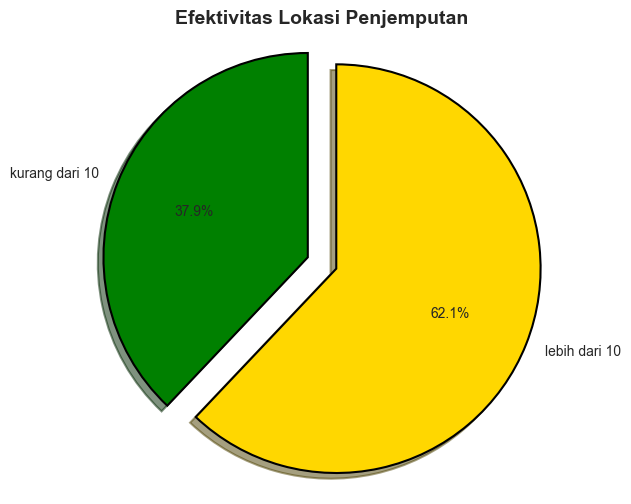

In [36]:
# Pie chart lebih menarik
colors = ['green', 'gold']
explode = (0.05, 0.1)  # Membuat efek keluar di tiap slice

plt.figure(figsize=(6, 6))
plt.pie(
    df_updown10['Jumlah Penjemputan'],
    labels=df_updown10['Lokasi Penjemputan'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'black'}
)
plt.title('Efektivitas Lokasi Penjemputan', fontsize=14, fontweight='bold')
plt.axis('equal') 
plt.show()

Insight :
1. Grafik pie chart "Efektivitas Lokasi Penjemputan" menunjukkan distribusi perjalanan taksi berdasarkan jumlah trip :
    - Lebih dari 10 trip : 62.1% dari total perjalanan.
    - Kurang dari 10 trip : 37.9% dari total perjalanan.

Rekomendasi :
1. Fokus pada Lokasi Hotspot (>10 Penjemputan):
    - Alokasikan lebih banyak armada ke lokasi-lokasi dengan lebih dari 10 penjemputan (hotspot) untuk memaksimalkan jumlah trip, terutama pada jam sibuk.
2. Tingkatkan Aktivitas di Lokasi dengan Penjemputan Rendah (<10 Penjemputan):
    - Jalankan promosi khusus (misalnya, diskon atau tarif flat) di lokasi dengan kurang dari 10 penjemputan untuk menarik lebih banyak pelanggan.

## Berdasarkan Trip Type

In [37]:
df_triptype = df['trip_type'].value_counts().reset_index()
df_triptype.head()

,trip_type,count
0,Dihentikan langsung di jalan,57194
1,Dipesan melalui layanan,1324


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15020\2053658236.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


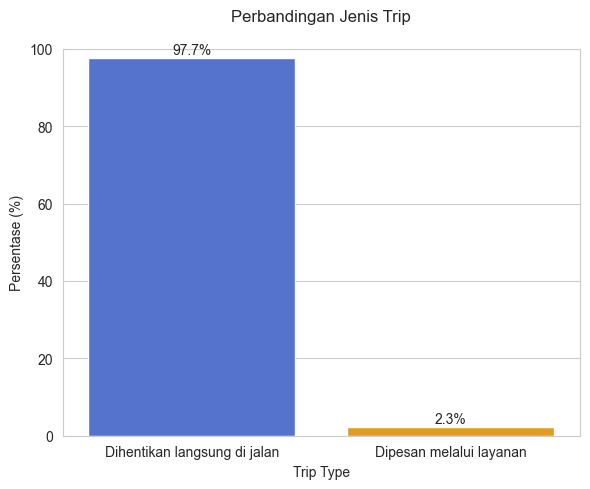

In [38]:
# Hitung persentase trip_type
df_triptype = df['trip_type'].value_counts(normalize=True).reset_index()
df_triptype.columns = ['trip_type', 'percentage']
df_triptype['percentage'] *= 100  # Ubah ke persen

# Visualisasi barplot
plt.figure(figsize=(6, 5))
sns.barplot(
    data=df_triptype,
    x='trip_type',
    y='percentage',
    palette=['royalblue', 'orange']  # Ubah warna bar
)

# Tambahkan label di atas bar
for i, value in enumerate(df_triptype['percentage']):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center')

plt.title('Perbandingan Jenis Trip', pad=20)
plt.xlabel('Trip Type')
plt.ylabel('Persentase (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Insight:

1. Dominasi Perjalanan Street-hail: Mayoritas perjalanan (97.7%) adalah perjalanan yang dihentikan langsung di jalan, menunjukkan bahwa pelanggan lebih sering menggunakan taksi secara spontan daripada memesan melalui layanan.
2. Penggunaan Layanan Dispatch Sangat Rendah: Hanya 2.3% perjalanan yang dipesan melalui layanan dispatch, yang mengindikasikan bahwa metode pemesanan ini kurang populer di kalangan pelanggan.

Rekomendasi :
1. Tingkatkan Penggunaan Layanan Dispatch:
    - Promosikan layanan dispatch melalui kampanye pemasaran, seperti diskon untuk pemesanan pertama atau tarif khusus untuk perjalanan yang dipesan melalui layanan.
    - Meningkatkan penggunaan layanan dispatch (yang saat ini hanya 2.3%) dapat memberikan sumber pendapatan yang lebih stabil, terutama di hari-hari dengan permintaan spontan rendah.
2. Tawarkan Insentif untuk Pemesanan Dispatch:
    - Berikan insentif seperti loyalty points atau potongan harga untuk pelanggan yang memesan melalui layanan dispatch, terutama pada jam-jam sibuk.
    - Ini dapat mendorong pelanggan untuk beralih dari street-hail ke dispatch, yang lebih mudah dikelola dan dapat meningkatkan efisiensi operasional.

## Berdasarkan Jumlah Penumpang

In [39]:
df_passcount = df['passenger_count'].sum()
df_passcount

np.float64(77487.0)

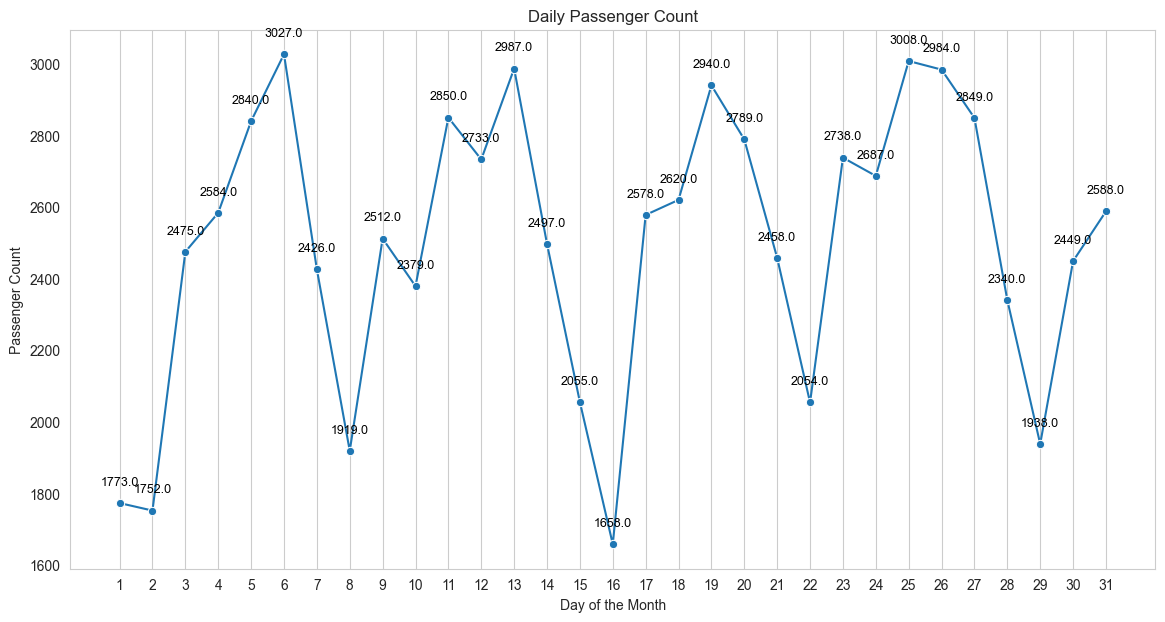

In [40]:
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day

# Hitung total penumpang per hari
daily_passenger_count = df.groupby('pickup_day')['passenger_count'].sum().reset_index()
daily_passenger_count.columns = ['Day', 'Passenger Count']

# Plot line chart
plt.figure(figsize=(14, 7))
sns.lineplot(x='Day', y='Passenger Count', data=daily_passenger_count, marker='o')
plt.title('Daily Passenger Count')
plt.xlabel('Day of the Month')
plt.ylabel('Passenger Count')
plt.xticks(range(1, 32))
plt.grid(axis='y')

# Tambahkan label nilai di atas tiap titik
for i in range(len(daily_passenger_count)):
    day = daily_passenger_count['Day'][i]
    count = daily_passenger_count['Passenger Count'][i]
    plt.text(day, count + 50, str(count), ha='center', fontsize=9, color='black')

plt.show()


Insight :
- Fluktuasi Jumlah Penumpang Harian: Jumlah penumpang harian di bulan Januari bervariasi signifikan, dengan puncak tertinggi pada tanggal 6 (3,027 penumpang) dan terendah pada tanggal 16 (1,658 penumpang). Puncak lainnya terjadi pada tanggal 19 (2,940) dan 25 (3,008), sementara penurunan besar terlihat pada tanggal 8, 16, dan 29.
- Tren Mingguan: Ada pola naik-turun yang cukup jelas, di mana jumlah penumpang cenderung rendah di awal dan pertengahan bulan, lalu meningkat di minggu ketiga dan keempat.

Rekomendasi :
- Promosi pada Hari Rendah: Tawarkan diskon atau promo khusus pada tanggal 8, 16, dan 29 untuk menarik lebih banyak penumpang, seperti potongan harga perjalanan atau bonus poin untuk pengguna aplikasi.
- Analisis Penyebab Puncak Penumpang: Investigasi apa yang menyebabkan lonjakan penumpang pada tanggal 6, 19, dan 25 (misalnya, event lokal, hari kerja sibuk, atau cuaca). Jika ada pola tertentu, replikasikan strategi tersebut di hari lain.
- Optimalisasi Armada: Pada hari-hari dengan penumpang rendah, alihkan armada ke area dengan permintaan lebih tinggi atau kurangi jumlah armada untuk efisiensi biaya operasional.


## Berdasarkan Waktu

In [41]:
df['day'] = pd.to_datetime(df['lpep_pickup_datetime']).apply(lambda x: datetime.strftime(x, '%A'))

In [42]:
# Mencari hari paling ramai / paling banyak penumpang berdasarkan total trip
df_hari = df['day'].value_counts().reset_index()
df_hari

,day,count
0,Tuesday,9581
1,Thursday,8699
2,Friday,8622
3,Wednesday,8479
4,Monday,8433
5,Saturday,7427
6,Sunday,7277


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15020\263509164.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_hari, x='day', y='count', palette='Blues')


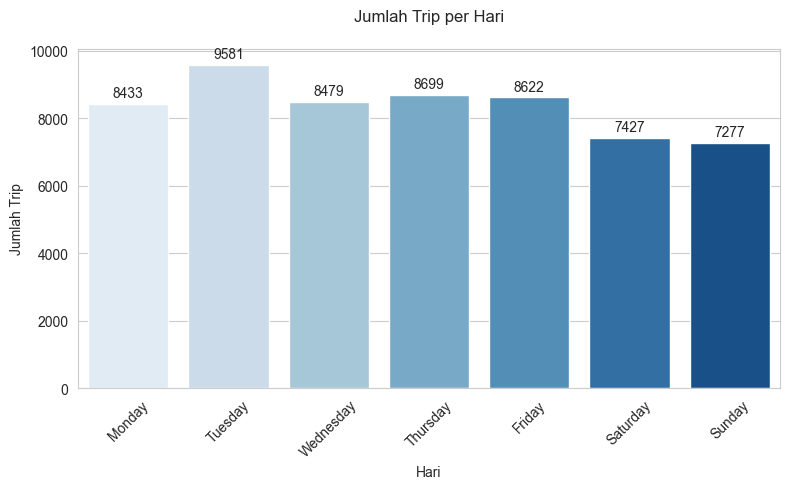

In [43]:
# Tentukan urutan hari dari Senin ke Minggu
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_hari['day'] = pd.Categorical(df_hari['day'], categories=day_order, ordered=True)
df_hari = df_hari.sort_values('day')

# Visualisasi barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_hari, x='day', y='count', palette='Blues')

# Tambahkan label jumlah di atas bar
for i, value in enumerate(df_hari['count']):
    plt.text(i, value + 200, str(value), ha='center')

plt.title('Jumlah Trip per Hari', pad=20)
plt.xlabel('Hari')
plt.ylabel('Jumlah Trip')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight :

1. Pola Mingguan: Jumlah perjalanan harian dalam seminggu menunjukkan variasi yang cukup jelas:
    - Hari Paling Sibuk: Selasa (Tuesday) memiliki jumlah perjalanan tertinggi dengan 9.581 trip, diikuti oleh Kamis (Thursday) dengan 8.699 trip dan Jumat (Friday) dengan 8.622 trip. Ini menunjukkan bahwa hari kerja tengah minggu (Selasa–Jumat) adalah periode paling sibuk, kemungkinan karena aktivitas rutin seperti perjalanan kerja.
    - Hari Paling Sepi: Akhir pekan, khususnya Minggu (Sunday) dan Sabtu (Saturday), memiliki jumlah perjalanan terendah, masing-masing 7.277 dan 7.427 trip. Ini menunjukkan penurunan aktivitas perjalanan di akhir pekan.
2. Konteks Dataset: Dataset NYC TLC Trip Record mencakup 68.211 perjalanan di bulan Januari 2023. Pola ini mengindikasikan bahwa permintaan transportasi lebih tinggi pada hari kerja, yang kemungkinan besar terkait dengan aktivitas pekerjaan atau sekolah.

Rekomendasi :
1. Optimalkan Distribusi Armada pada Hari Kerja:
Fokuskan lebih banyak armada pada hari kerja, terutama Selasa, Kamis, dan Jumat (dengan 9.581, 8.699, dan 8.622 trip), untuk memenuhi permintaan tinggi. Pastikan armada tersedia di lokasi dengan PULocationID dan DOLocationID yang sering digunakan pada hari-hari tersebut (gunakan analisis frekuensi lokasi dari dataset).
2. Tawarkan Promosi pada Akhir Pekan:
Untuk meningkatkan jumlah perjalanan pada akhir pekan (Sabtu dan Minggu, dengan 7.427 dan 7.277 trip), tawarkan promosi khusus, seperti diskon untuk perjalanan wisata, paket keluarga, atau tarif malam untuk acara sosial. Targetkan segmen pelanggan yang aktif di akhir pekan, seperti wisatawan, keluarga, atau mereka yang menghadiri acara, untuk mendorong lebih banyak perjalanan.
3. Atur Efisiensi Armada pada Akhir Pekan:
Kurangi jumlah armada yang beroperasi pada Sabtu dan Minggu untuk menghemat biaya operasional (bahan bakar, tenaga kerja), karena permintaan lebih rendah.


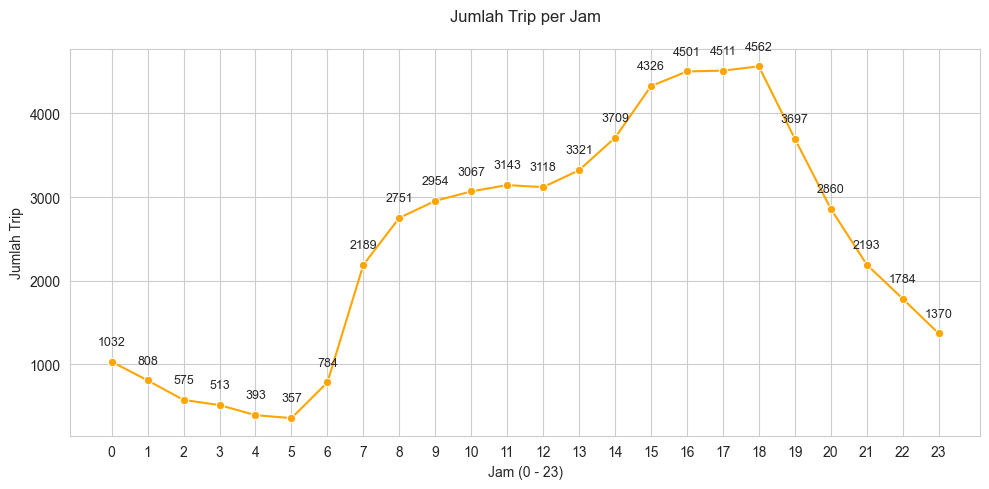

In [44]:
# Ekstrak jam dari kolom pickup
df['hour'] = df['lpep_pickup_datetime'].dt.hour

# Hitung jumlah trip per jam
df_jam = df['hour'].value_counts().reset_index()
df_jam.columns = ['hour', 'count']
df_jam = df_jam.sort_values('hour')

# Visualisasi line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_jam, x='hour', y='count', marker='o', color='orange')

# Tambahkan label di atas titik
for i, row in df_jam.iterrows():
    plt.text(row['hour'], row['count'] + 200, str(row['count']), ha='center', fontsize=9)

plt.title('Jumlah Trip per Jam', pad=20)
plt.xlabel('Jam (0 - 23)')
plt.ylabel('Jumlah Trip')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Insight :

1. Jam Sibuk (Rush Hour): Puncak jumlah perjalanan terjadi pada jam 14:00–19:00, dengan jumlah tertinggi di jam 18:00 (4.562 perjalanan). Ini menunjukkan jam sibuk sore hari, kemungkinan saat orang pulang kerja atau beraktivitas di sore hari.
2. Jam Sepi: Jumlah perjalanan paling rendah terjadi pada dini hari, terutama jam 4:00 (393 perjalanan) dan jam 5:00 (357 perjalanan). Ini wajar karena aktivitas masyarakat biasanya menurun pada jam tersebut.
3. Tren Kenaikan dan Penurunan: Jumlah perjalanan mulai meningkat tajam setelah jam 6:00, mencapai puncak di sore hari, lalu menurun drastis setelah jam 19:00 hingga dini hari.

Rekomendasi :
1. Optimalkan Distribusi Armada pada Jam Sibuk:
    - Fokuskan lebih banyak armada pada jam sibuk (14:00–19:00) untuk memenuhi permintaan tinggi. Pastikan armada tersedia di lokasi dengan PULocationID dan DOLocationID yang paling sering digunakan pada jam tersebut.
2. Atur Efisiensi Armada pada Jam Sepi:
    - Kurangi jumlah armada yang beroperasi pada jam sepi (00:00–6:00) untuk menghemat biaya operasional, seperti bahan bakar dan tenaga kerja. Redistribusikan armada ke jam-jam sibuk untuk meningkatkan efisiensi. Pertimbangkan untuk menggunakan armada yang lebih kecil atau kendaraan hemat energi pada jam sepi untuk menekan biaya.
3. Telusuri alasan penurunan tajam setelah jam 19.00. Apakah ada faktor eksternal seperti cuaca, hari libur, atau kurangnya permintaan? Jika ini pola harian, pertimbangkan strategi seperti promo malam hari (misalnya, diskon untuk perjalanan setelah jam 17:00) untuk menarik lebih banyak pelanggan.

## Berdasarkan Payment Type

In [45]:
df_payment = df['payment_type'].value_counts().reset_index()
df_payment.head()

,payment_type,count
0,Kartu kredit,38763
1,Tunai,19755


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15020\1371855527.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_payment, x='payment_type', y='count', palette='Blues')


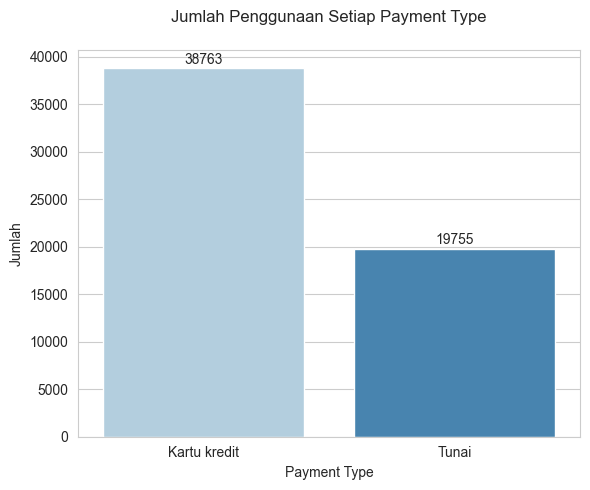

In [46]:
# Hitung jumlah masing-masing payment_type
df_payment = df['payment_type'].value_counts().reset_index()
df_payment.columns = ['payment_type', 'count']

# Visualisasi barplot
plt.figure(figsize=(6, 5))
sns.barplot(data=df_payment, x='payment_type', y='count', palette='Blues')

# Tambahkan label di atas bar
for i, value in enumerate(df_payment['count']):
    plt.text(i, value + 500, str(value), ha='center')

plt.title('Jumlah Penggunaan Setiap Payment Type', pad=20)
plt.xlabel('Payment Type')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

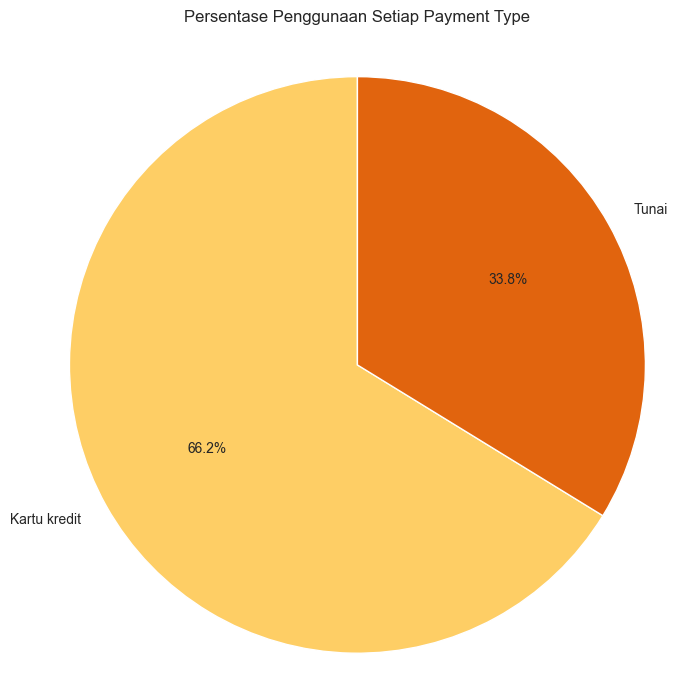

In [47]:
# Hitung persentase masing-masing payment_type
df_payment = df['payment_type'].value_counts(normalize=True).reset_index()
df_payment.columns = ['payment_type', 'percentage']
df_payment['percentage'] *= 100  # Ubah ke persen

# Visualisasi pie chart dengan warna kuning ke oranye
plt.figure(figsize=(7, 7))
plt.pie(
    df_payment['percentage'],
    labels=df_payment['payment_type'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('YlOrBr', len(df_payment))
)
plt.title('Persentase Penggunaan Setiap Payment Type', pad=20)
plt.axis('equal')  # Agar bentuk pie-nya bulat
plt.tight_layout()
plt.show()

Insight :
- Grafik diatas menunjukkan distribusi metode pembayaran (payment_type) yang digunakan oleh pelanggan:
    - Kartu Kredit: 66.2% dari total transaksi.
    - Tunai: 33.8% dari total transaksi.

Rekomendasi
1. Dorong Penggunaan Pembayaran Non-Tunai (Kartu Kredit):
    - Berikan insentif untuk pembayaran menggunakan kartu kredit, seperti diskon kecil, cashback, atau poin loyalitas. Ini dapat mendorong lebih banyak pelanggan beralih dari tunai ke kartu kredit, yang saat ini sudah menjadi preferensi mayoritas (66,2%).
    - Pembayaran non-tunai biasanya lebih cepat dan mengurangi risiko kehilangan uang tunai bagi pengemudi, sehingga meningkatkan efisiensi operasional.
2. Edukasi dan Promosi untuk Pengguna Tunai:
    - Untuk 33,8% pengguna yang masih menggunakan tunai, tawarkan promosi khusus jika mereka beralih ke pembayaran non-tunai (misalnya, potongan harga untuk perjalanan pertama menggunakan kartu kredit).
    - Edukasi pelanggan tentang keuntungan pembayaran non-tunai, seperti keamanan, kemudahan, dan potensi reward.
3. Kurangi Ketergantungan pada Tunai untuk Efisiensi:
    - Pembayaran tunai sering kali memakan waktu lebih lama (pengemudi perlu menghitung kembalian) dan berisiko (kehilangan atau pencurian). Dengan mendorong lebih banyak pembayaran non-tunai, perusahaan dapat mengurangi waktu transaksi dan meningkatkan jumlah perjalanan per hari, yang pada akhirnya meningkatkan profit.

## Berdasarkan Income

In [48]:
incomeyear = df.groupby(df['lpep_dropoff_datetime'].dt.year)['total_amount'].sum()
incomeyear

lpep_dropoff_datetime
2009         43.20
2022         52.40
2023    1289865.79
Name: total_amount, dtype: float64

In [49]:
incomemonth = df.groupby(df['lpep_dropoff_datetime'].dt.month)['total_amount'].sum()
incomemonth

lpep_dropoff_datetime
1     1289547.69
2         361.30
12         52.40
Name: total_amount, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15020\3190254110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incomeyear.index.astype(str), y=incomeyear.values, palette='Blues')


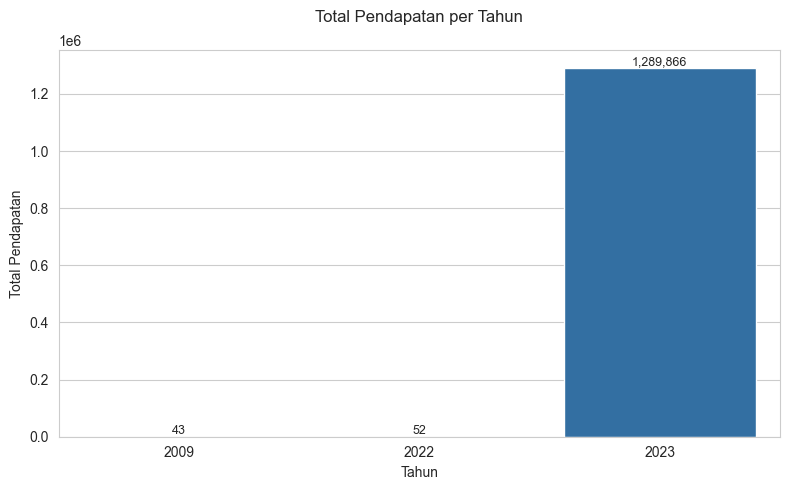

In [50]:
# Visualisasi bar plot pendapatan per tahun
plt.figure(figsize=(8, 5))
sns.barplot(x=incomeyear.index.astype(str), y=incomeyear.values, palette='Blues')

# Tambahkan label di atas bar
for i, value in enumerate(incomeyear.values):
    plt.text(i, value + 10000, f'{value:,.0f}', ha='center', fontsize=9)

plt.title('Total Pendapatan per Tahun', pad=20)
plt.xlabel('Tahun')
plt.ylabel('Total Pendapatan')
plt.tight_layout()
plt.show()

Insight ~
1. Tren Pendapatan Tahunan (dari histogram "Total Pendapatan per Tahun"):
    - Pendapatan perusahaan meningkat signifikan dari tahun ke tahun: 43 (2009), 52 (2022), hingga 1.289.886 (2023).
    - Kenaikan paling drastis terjadi antara 2022 dan 2023, menunjukkan adanya pertumbuhan bisnis yang sangat baik di tahun 2023.

Rekomendasi

1. Manfaatkan Tren Pertumbuhan Tahunan:
    - Dengan lonjakan pendapatan di 2023, perusahaan bisa memperluas armada atau layanan di area dengan permintaan tinggi (gunakan analisis PULocationID dan DOLocationID untuk mengidentifikasi lokasi populer).
    - Investasikan keuntungan 2023 untuk ekspansi pasar atau peningkatan teknologi, seperti aplikasi pemesanan yang lebih user-friendly.
2. Optimasi Operasional Berdasarkan Lokasi:
    - Gunakan kode yang telah dibuat untuk menghitung frekuensi penjemputan dan pengantaran (pickup_counts dan dropoff_counts) untuk mengidentifikasi lokasi paling sibuk.
    - Fokuskan armada pada lokasi dengan pickup_count dan dropoff_count tertinggi untuk memaksimalkan jumlah perjalanan dan pendapatan.

In [51]:
# berfokus ke 2023
df_income2023 = df[['lpep_dropoff_datetime', 'total_amount']][df['lpep_dropoff_datetime'].dt.year == 2023]
df_income2023

,lpep_dropoff_datetime,total_amount
0,2023-01-01 00:37:11,24.18
1,2023-01-01 00:57:49,15.84
2,2023-01-01 00:41:32,11.64
5,2023-01-01 01:11:04,22.95
7,2023-01-01 00:24:55,16.70
...,...,...
68206,2023-01-31 22:42:00,16.70
68207,2023-01-31 22:48:00,5.41
68208,2023-02-01 00:02:00,21.04
68209,2023-01-31 23:19:00,19.18


In [52]:
df_incomejan = df[['lpep_dropoff_datetime', 'total_amount']][df['lpep_dropoff_datetime'].dt.month == 1]
df_incomejan

,lpep_dropoff_datetime,total_amount
0,2023-01-01 00:37:11,24.18
1,2023-01-01 00:57:49,15.84
2,2023-01-01 00:41:32,11.64
5,2023-01-01 01:11:04,22.95
7,2023-01-01 00:24:55,16.70
...,...,...
68204,2023-01-31 22:05:00,21.68
68205,2023-01-31 22:14:00,25.02
68206,2023-01-31 22:42:00,16.70
68207,2023-01-31 22:48:00,5.41


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15020\2765804948.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_jan_daily, x='date', y='total_amount', palette='Oranges')


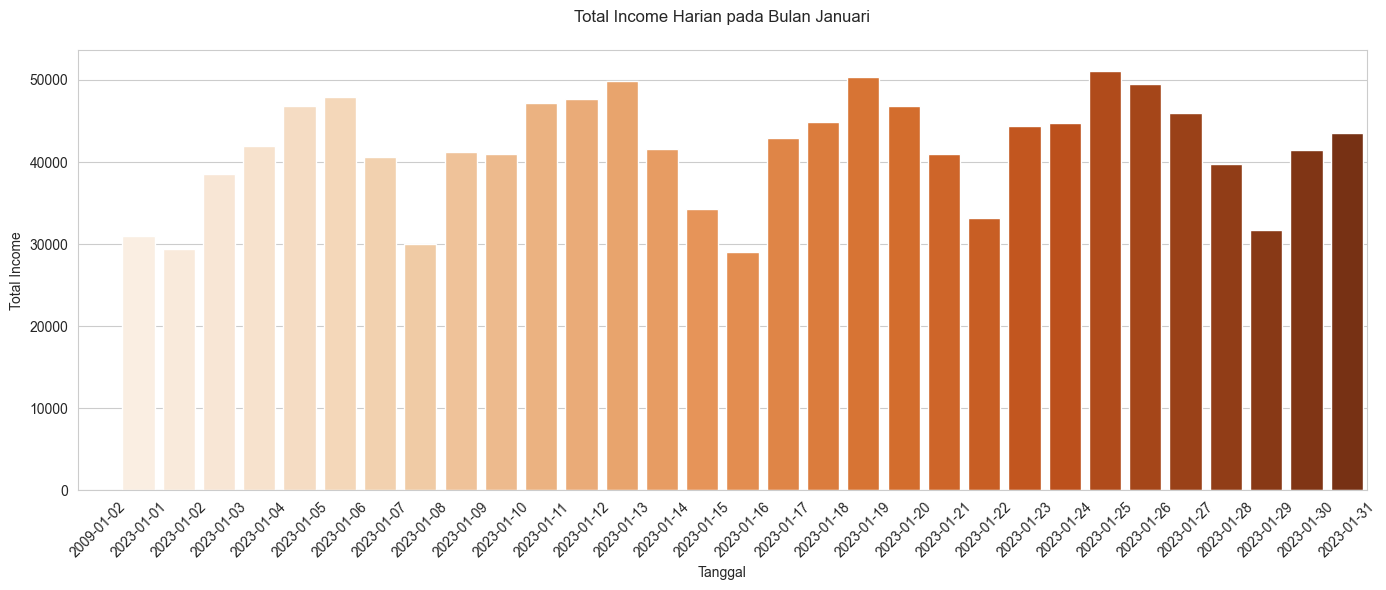

In [53]:
# Ekstrak tanggal (tanpa jam)
df_incomejan['date'] = df_incomejan['lpep_dropoff_datetime'].dt.date

# Group by tanggal dan jumlahkan total_amount
income_jan_daily = df_incomejan.groupby('date')['total_amount'].sum().reset_index()

# Visualisasi barplot
plt.figure(figsize=(14, 6))
sns.barplot(data=income_jan_daily, x='date', y='total_amount', palette='Oranges')

# Styling
plt.title('Total Income Harian pada Bulan Januari', pad=20)
plt.xlabel('Tanggal')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight :
1. Pola Naik-Turun Terlihat Signifikan:
    - Ada fluktuasi cukup jelas, dengan income tertinggi terjadi sekitar tanggal 24–26 Januari.
    - Sedangkan income cukup rendah terlihat di awal bulan (1–2 Januari) dan pertengahan bulan (sekitar tanggal 15–16 dan 29).
2. Puncak Pendapatan Tidak Stabil:
    - Peningkatan yang tajam di minggu ketiga dan keempat, namun tidak konsisten sepanjang minggu.
    - Bisa jadi ini karena faktor eksternal seperti hari libur, cuaca, event lokal, atau tren perjalanan masyarakat.
3. Awal dan Akhir Bulan Relatif Lebih Rendah:
    - Awal bulan dan akhir bulan cenderung menghasilkan income yang lebih kecil dibandingkan pertengahan bulan.

Rekomendasi :
1. Analisa Penyebab Pendapatan Tertinggi:
    - Telusuri apa yang terjadi pada tanggal 24–26 Januari (misalnya, event besar, promosi, cuaca bagus) dan replikasi strategi serupa di minggu lain.
2. Promosi di Hari-Hari Rendah:
    - Jalankan promo khusus di hari-hari pendapatan rendah (1–2, 15–16, 29 Januari) seperti diskon, bundling, atau loyalty point.
3. Optimasi Armada:
    - Di hari-hari rendah, pertimbangkan untuk mengatur ulang distribusi armada agar lebih efisien, atau diarahkan ke area dengan permintaan lebih tinggi.
4. Kolaborasi dengan Event Lokal:
    - Jika lonjakan income terkait event lokal, pertimbangkan kerja sama dengan penyelenggara event untuk menyediakan transportasi eksklusif.
5. Pantau dan Evaluasi Bulanan:
    - Lakukan analisis seperti ini setiap bulan untuk melihat tren musiman dan respons dari strategi promosi atau perubahan operasional.

# Kesimpulan

Kesimpulan dari Analisis Data NYC TLC Trip Record

Berdasarkan analisis dataset NYC TLC Trip Record dan visualisasi yang telah dilakukan, berikut adalah kesimpulan utama dari seluruh data :

1. Efektivitas Total Trip Berdasarkan Lokasi Penjemputan:
    - Sebanyak 62.1% perjalanan berasal dari lokasi penjemputan (PULocationID) dengan lebih dari 10 penjemputan, menunjukkan adanya "hotspot" yang menyumbang mayoritas trip. Sementara itu, 37.9% trip berasal dari lokasi dengan kurang dari 10 penjemputan, mengindikasikan potensi yang belum tergarap di lokasi-lokasi tersebut.
2. Dominasi Perjalanan Street-hail:
    - Sebanyak 97.7% perjalanan adalah street-hail (dihentikan langsung di jalan), sedangkan hanya 2.3% yang dipesan melalui layanan dispatch. Hal ini menunjukkan ketergantungan besar pada perjalanan spontan, dengan layanan dispatch yang masih sangat kurang dimanfaatkan.
3. Preferensi Pembayaran Pelanggan:
    - Sebanyak 66.2% pelanggan menggunakan kartu kredit untuk pembayaran, sementara 33.8% masih menggunakan tunai. Ini mencerminkan kecenderungan pelanggan untuk beralih ke pembayaran digital, meskipun pembayaran tunai masih relevan bagi sepertiga pelanggan.
4. Fluktuasi Pendapatan Harian pada Bulan Januari:
    - Pendapatan harian menunjukkan fluktuasi yang signifikan, dengan puncak tertinggi terjadi pada tanggal 24–26 Januari, dan pendapatan terendah di awal bulan (1–2 Januari), pertengahan bulan (15–16 Januari), dan akhir bulan (29 Januari). Faktor eksternal seperti event, cuaca, atau tren perjalanan masyarakat kemungkinan memengaruhi pola ini.
5. Total Pendapatan Tahunan (Grafik Tambahan):
    - Berdasarkan grafik "Total Pendapatan per Tahun" (meskipun dataset hanya mencakup Januari 2023), pendapatan pada 2023 mencapai 1,289,866$, jauh lebih tinggi dibandingkan 2009 (43$) dan 2022 (52$). Namun, data untuk 2009 dan 2022 tampak tidak realistis dan kemungkinan hanya dummy data, sehingga analisis lebih lanjut diperlukan dengan dataset yang lebih lengkap.